In [2]:
##import packages to be used in this session
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [3]:
##import project csv file
df=pd.read_csv("Data/COVID_project_PPOL564.csv")

In [4]:
##print shape
df.shape

(974, 31)

In [5]:
##view first 10 observations
df.head(10)

,fips,state,county,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,...,ownership,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,Uninsured adults raw value,exercise_opp,income_ineq,crime_violent
0,1001,AL,Autauga County,119,44,21,0,0,0,55869,...,0.748946,23.628395,7.2,2220.160000,0.0,11.7,0.111490,0.691301,5.234597,272.282220
1,1003,AL,Baldwin County,201,144,6,0,0,0,223234,...,0.736193,31.825343,8.0,1371.793548,0.0,10.3,0.143485,0.737135,4.417767,203.660396
2,1005,AL,Barbour County,91,5,32,0,0,0,24686,...,0.613978,23.449713,5.6,3158.750000,0.0,11.5,0.160858,0.531668,5.681410,414.277861
3,1007,AL,Bibb County,50,17,5,0,0,0,22394,...,0.750731,52.600206,7.8,2060.727273,0.0,11.2,0.130000,0.162514,4.368581,89.349126
4,1009,AL,Blount County,37,15,0,0,0,0,57826,...,0.786262,17.694495,8.4,4462.538462,0.0,11.7,0.170823,0.156345,4.430262,482.690611
5,1011,AL,Bullock County,125,0,106,0,0,0,10101,...,0.755334,30.618760,4.3,3436.333333,0.0,11.2,0.152410,0.025014,7.410196,311.027333
6,1013,AL,Butler County,263,65,166,0,0,0,19448,...,0.699463,37.511848,6.6,3965.000000,1.0,10.6,0.145058,0.485797,5.423596,581.584005
7,1015,AL,Calhoun County,124,72,23,0,0,0,113605,...,0.694735,40.681183,6.9,1571.616438,0.0,11.8,0.153887,0.477212,5.023896,756.066544
8,1017,AL,Chambers County,301,81,181,0,0,0,33254,...,0.677641,25.672844,6.4,2408.071429,0.0,11.4,0.152263,0.618647,4.744932,528.999736
9,1021,AL,Chilton County,65,27,0,0,0,0,44428,...,0.748493,33.224416,8.1,4896.333333,0.0,11.2,0.175047,0.462938,5.107668,507.810721


We'll start by examining the data types and making adjustments to prepare for visualization and take notes for high-level pre-processing.

In [6]:
##check data types
df.dtypes

fips                            int64
state                          object
county                         object
cases                           int64
white_cases                     int64
black_cases                     int64
hispanic_cases                  int64
native_cases                    int64
asian_cases                     int64
TOT_POP                         int64
WH                              int64
BA                              int64
AA                              int64
IA                              int64
HI                              int64
GDP                           float64
pov_perc                      float64
Med_inc                        object
Unemployment Rate             float64
traffic_vol                   float64
house_burden                  float64
ownership                     float64
residential_seg               float64
food_index                    float64
pop_to_phys                   float64
water_violation               float64
air_pollutio

Let's convert 'Med_inc'(median household income) to a numeric data type as it is currently object/string data type. Let's also convert 'water_violation' to a categorical data type: this is a binary variable which takes on a value of either 0 or 1 to indicate if a water violation has been reported in the county. 

In [7]:
## remove commas from Med_inc column
df['Med_inc']=df['Med_inc'].str.replace(",","")
##change 'Med_inc' to dtype integer
df['Med_inc']=df['Med_inc'].astype('int')

In [8]:
## change 'water_violation' to dtype category
df['water_violation']=df['water_violation'].astype('category')

Now, we'll look at missingness in our data. This will determine if observations need to be removed; if imputation needs to be considered; or if observations need to be subsetted. 

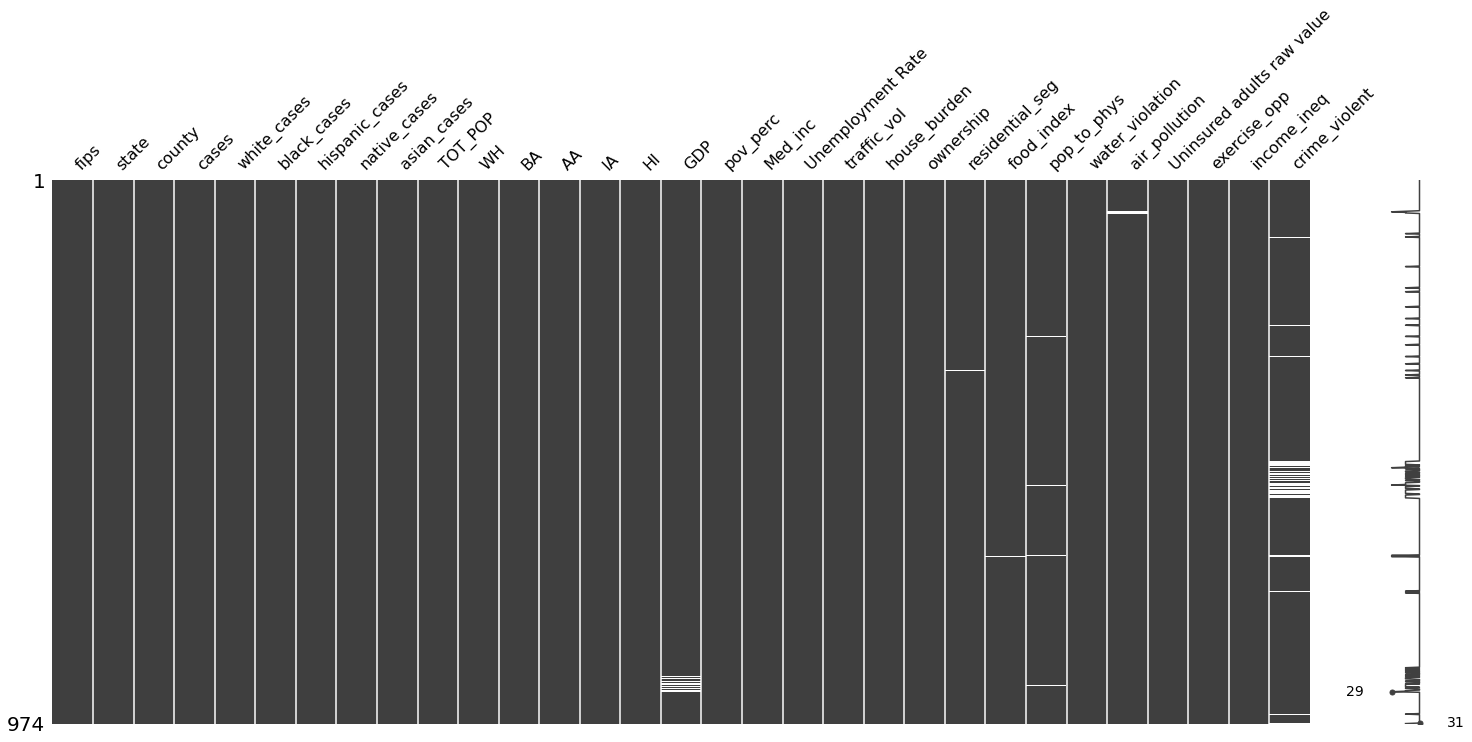

In [9]:
## examine missingness 
miss.matrix(df) 

Looking at the plot above, a couple of the feature variables stand out as having missing values: 'GDP' and 'crime_violent' seem to having the most missing observations, closely followed by 'residential_seg','food_index','pop_to_phys','water_violation', and 'air_pollution'. Next, a numeric description of missingness will be generated to see the extent of missingness and determine how best to deal with missing values. 

In [10]:
##numeric visualization of missingness 
df.isnull().sum()

fips                           0
state                          0
county                         0
cases                          0
white_cases                    0
black_cases                    0
hispanic_cases                 0
native_cases                   0
asian_cases                    0
TOT_POP                        0
WH                             0
BA                             0
AA                             0
IA                             0
HI                             0
GDP                           19
pov_perc                       0
Med_inc                        0
Unemployment Rate              0
traffic_vol                    0
house_burden                   0
ownership                      0
residential_seg                2
food_index                     4
pop_to_phys                    9
water_violation                1
air_pollution                  4
Uninsured adults raw value     0
exercise_opp                   0
income_ineq                    0
crime_viol

In attempt 1, I decided to remove the crime_violent variable because of the amount of missingness and because it is highly correlated with other variables. In this attempt, I will keep this variable and remove observations for which this variable is missing (i.e., about 56 observations). I decided to keep this variable for this attempt becuase I am curious about how it will be used in the modeling portion below. 

Similar to the first attempt, I will remove observations with any missing values. Note that imputation will be used for future attempts. My desire is to simply see how altering my outcome variable; adding crime_violent to the data set; and binning some variables in the highlevel pre processing stage will affect the prediction compared to my first attempt. 

In [122]:
##create modified dataframe 
df2=df
##check shape
df2.shape

(974, 31)

In [12]:
## remove observations with NAs for all feature variabels 
df2= df2.dropna()

In [13]:
##double check missingness 
df2.isnull().sum()

fips                          0
state                         0
county                        0
cases                         0
white_cases                   0
black_cases                   0
hispanic_cases                0
native_cases                  0
asian_cases                   0
TOT_POP                       0
WH                            0
BA                            0
AA                            0
IA                            0
HI                            0
GDP                           0
pov_perc                      0
Med_inc                       0
Unemployment Rate             0
traffic_vol                   0
house_burden                  0
ownership                     0
residential_seg               0
food_index                    0
pop_to_phys                   0
water_violation               0
air_pollution                 0
Uninsured adults raw value    0
exercise_opp                  0
income_ineq                   0
crime_violent                 0
dtype: i

In [14]:
##view dataframe
df2.shape

(885, 31)

Before we begin exploring this data, we need to split it into a training and test dataset. Since the outcome variable has not been generated just yet, we will start by creating the outcome variable, then the data will be split into training and test.

### Step 1: Create Outcome Variable
The goal of this project is to examine the factors that lead to racial and ethnic health disparities among racial and ethnic minority population in COVID-19 cases. The outcome variable will be generated by: 
1. Calculating the COVID-19 percentage share by race and ethnicity for each county
2. Calculating the racial/ethnic distribution of populations for each county
3. Subtracting the COVID-19 case percentage from the population percentage for each race/ethnicity in each county. If the value is positive, it is indicative of a disparity in COVID-19 cases for that race/ethnicity; if the value is equal to 0, the COVID-19 cases for that race/ethnicity is the same as their population; lastly, if the value is negative, the COVID-19 cases for that race/ethnicity is less than their share of the population. This disparity metric calculation was taken from the CDC: https://www.cdc.gov/nchs/nvss/vsrr/covid19/health_disparities.htm. Note: unlike the CDC metric, the outcome variable for all ethnic/racial minorities will be one. That is, the COVID-19 cases and county population for black, hispanic, native american, and asian persons will be summed together to create this metric.

**NOTE: Unlike the first attempt, the outcome variable will be a measure of disparity only for the Black population. This decision is motivated by the results from the previous model as well as literature on disparity research which notes that the influence of/experience with
the county characteristics used in these models will vary for different racial/ethnic groups.**

#### 1. Calculating the COVID-19 percentage share by race and ethnicity for each county

In [15]:
##calculate percentage share of black cases out of  total cases
df2['cases_min_pop']=df2['black_cases']/df2['cases']

#### 2. Calculating the racial/ethnic distribution of populations for each county

In [16]:
##calculate percentage of black population out of total population
df2['min_pop']=df2['BA']/df2['TOT_POP']

#### 3. Subtracting the COVID-19 case percentage from the population percentage for each race/ethnicity in each county.

In [17]:
##create disparity index
df2['disp_index']=df2['cases_min_pop']-df2['min_pop']
##multiply by 100
df2['disp_index'] = df2['disp_index'].apply(lambda x: x*100)

In [18]:
##check dtype
df2.disp_index.dtypes

dtype('float64')

### Step 2: Separate into training and test data sets

In [19]:
## isolate outcome from features
y = df2[['disp_index']]
X = df2.drop(columns=['disp_index'])

In [20]:
## split in to training (75% of data) and test (25% of data); set random state to replicate same split every time
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [21]:
##check shape to confirm split
print(train_X.shape[0]/df2.shape[0])
print(test_X.shape[0]/df2.shape[0])

0.7491525423728813
0.25084745762711863


### Step 3: Explore training dataset

In [123]:
##view first 20 observations
train_X.head(20)

,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,WH,BA,AA,...,ownership,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,Uninsured adults raw value,exercise_opp,income_ineq,crime_violent
0,0.230882,0.0,0.5,0.0,0.0,0.0,0.038272,0.105389,0.434721,0.148238,...,0.799496,0.189728,0.519481,0.704762,0.0,0.620690,0.599676,0.002838,0.278707,1.000000
1,0.334819,0.5,0.0,0.0,0.0,0.0,0.305764,0.441796,0.372548,0.365671,...,0.899218,0.286858,0.896104,0.381583,0.0,0.456897,0.342282,0.796939,0.116908,0.523915
2,0.191722,0.5,0.0,0.0,0.0,0.0,0.246709,0.393486,0.252455,0.394330,...,0.851336,0.429110,0.727273,0.365229,0.0,0.551724,0.333812,0.606069,0.172537,0.637204
3,0.321898,0.5,0.0,0.0,0.0,0.0,0.588783,0.667941,0.534367,0.699018,...,0.774085,0.240227,0.753247,0.215917,1.0,0.327586,0.151389,0.745715,0.102503,0.631934
4,0.362854,0.5,0.0,0.0,0.0,0.0,0.296184,0.438293,0.336354,0.284123,...,0.915178,0.269961,0.870130,0.494180,0.0,0.706897,0.097373,0.638658,0.111644,0.535370
5,0.460721,0.5,0.5,0.0,0.0,0.0,0.558173,0.570806,0.767450,0.621104,...,0.851070,0.333159,0.688312,0.411370,0.0,0.715517,0.412160,0.774355,0.064480,0.572112
6,0.432995,0.5,1.0,0.5,0.0,0.0,0.492767,0.579927,0.584733,0.659168,...,0.756191,0.219159,0.714286,0.050181,1.0,0.629310,0.311673,0.840988,0.395497,0.553214
7,0.122223,0.5,0.0,0.0,0.0,0.0,0.175758,0.340612,0.102789,0.198159,...,0.908561,0.335331,0.857143,0.315381,0.0,0.560345,0.075414,0.764353,0.094579,0.466937
8,0.215845,0.5,0.0,0.0,0.0,0.0,0.232294,0.385327,0.152696,0.269590,...,0.833601,0.264239,0.753247,0.272974,1.0,0.318966,0.607867,0.591408,0.106833,0.585659
9,0.443690,0.5,1.0,0.0,0.0,0.0,0.306485,0.412377,0.538560,0.289043,...,0.862768,0.360441,0.675325,0.401700,0.0,0.689655,0.394871,0.688053,0.387901,0.829707


__What is the distribution of the feature variables?__

Check the distribution of all continious variables coded with dtype 'int'.

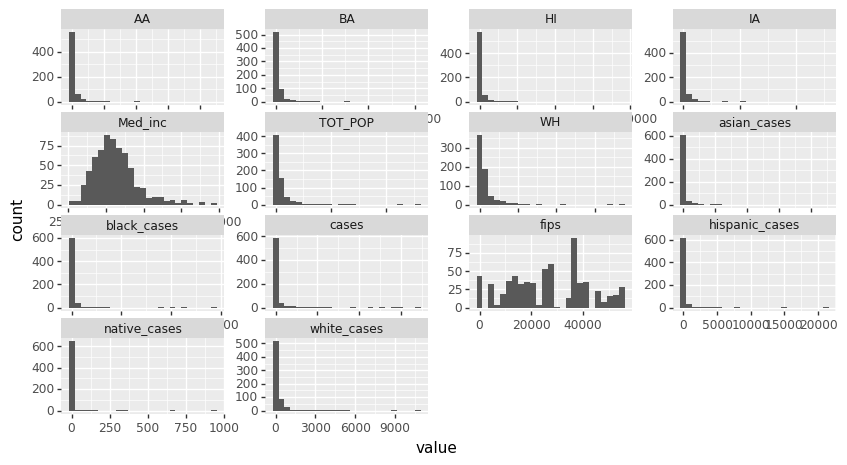

<ggplot: (8767276134352)>

In [23]:
## view continous int variables
d = train_X.select_dtypes(include="int").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

The 'fips' variable will not be included in the model. Apart from the median income variable ('Med_inc'), the rest of the variables have a right skew. These variables represent a county's population and a county's COVID-19 cases by racial and ethnic groups. Let's log these variables and see how their distribution changes

In [24]:
## check if any of the variables have a value of 0 before taking their log
print((train_X == 0).sum())

fips                            0
state                           0
county                          0
cases                           0
white_cases                    44
black_cases                   326
hispanic_cases                410
native_cases                  633
asian_cases                   556
TOT_POP                         0
WH                              0
BA                              0
AA                              0
IA                              0
HI                              0
GDP                             0
pov_perc                        0
Med_inc                         0
Unemployment Rate               0
traffic_vol                     0
house_burden                    0
ownership                       0
residential_seg                 0
food_index                      0
pop_to_phys                     0
water_violation               391
air_pollution                   0
Uninsured adults raw value      0
exercise_opp                    1
income_ineq   

Variables to add 1 to when logging: white_cases, black_cases, hispanic_cases, native_cases, asian_cases, water_violation, exercise_opp. Note that cases_min_pop represents the share of black cases. It was generated to create the outcome variable; it will not be included in the model. 

In [25]:
## check min value to confirm absence of negative values before taking the log of any of the variables
print(train_X.min())

fips                                     1001
state                                      AL
county                        Accomack County
cases                                       5
white_cases                                 0
black_cases                                 0
hispanic_cases                              0
native_cases                                0
asian_cases                                 0
TOT_POP                                  4736
WH                                        933
BA                                         44
AA                                         11
IA                                          9
HI                                         63
GDP                                    118542
pov_perc                                  4.2
Med_inc                                 26814
Unemployment Rate                         1.6
traffic_vol                           3.93745
house_burden                        0.0509467
ownership                         

In [26]:
##log variables
d = train_X.copy()
## asian american population
d['ln_AA'] =  np.log(d['AA'])
## black american population
d['ln_BA'] =  np.log(d['BA'])
## native american population
d['ln_IA'] =  np.log(d['IA'])
## hispanic population
d['ln_HI'] =  np.log(d['HI'])
## white population
d['ln_WH'] =  np.log(d['WH'])
## total county population
d['ln_TOT_POP'] =  np.log(d['TOT_POP'])
## total covid cases in county
d['ln_cases'] =  np.log(d['cases'])
## asian american cases
d['ln_AAcases'] =  np.log(d['asian_cases'] + 1)## add 1 to avoid loggin 0s
## black american cases
d['ln_BAcases'] =  np.log(d['black_cases'] + 1)## add 1 to avoid loggin 0s
## native american cases
d['ln_IAcases'] =  np.log(d['native_cases'] + 1)## add 1 to avoid loggin 0s
## hispanic cases
d['ln_HIcases'] =  np.log(d['hispanic_cases'] + 1)## add 1 to avoid loggin 0s
## white cases 
d['ln_WHcases'] =  np.log(d['white_cases'] + 1)## add 1 to avoid loggin 0s

In [27]:
##keep only logged variables
d=d.loc[:, d.columns.str.startswith('ln')]
##transform from wide to long for visualization
d=d.melt()

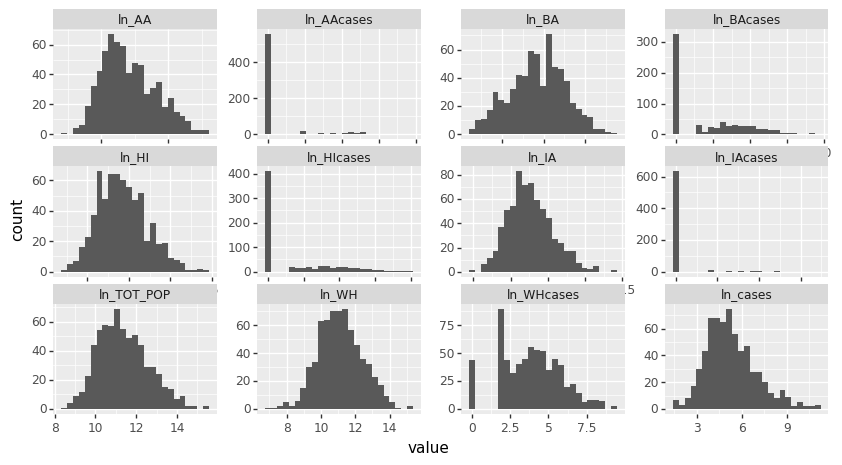

<ggplot: (8767277443223)>

In [28]:
##visualize
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

While logging seems to have normalized the distribution of the population variables, the racial and ethnic breakdown of COVID-19 cases has not normalized.There are a lot of observations with a value of 0 for these variables; there are alot of white spaces that are not supported by the data--this is something we don't want the model to learn. As such, unlike the first attempt, these variables will be binned/changed into a categorical variable. The downside to this is we will be losing information. 

Next, let us visualize the continious variables with dtype=float.

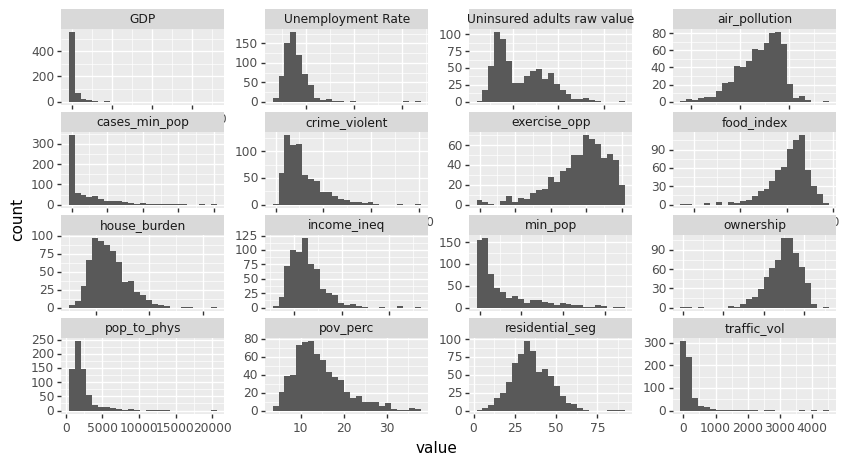

<ggplot: (8767277159795)>

In [29]:
## view continious float variables
e = train_X.select_dtypes(include="float").melt()
(
    ggplot(e,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

The variables min_pop and cases_min_pop will not be included in the model since they were generated to create the outcome variable. GDP, Unemployment Rate, ownership, pop_to_phys, crime_violent, and traffic volume seem to have a pronounced skew. Let us log these variables and see how they look: 
    

In [30]:
##log variables
d = train_X.copy()
##GDP
d['ln_GDP'] =  np.log(d['GDP'])
## unemployment rate
d['ln_Unemployment Rate'] =  np.log(d['Unemployment Rate'])
## ownership
d['ln_ownership'] =  np.log(d['ownership'])
## ratio of physician to population
d['ln_pop_to_phys'] =  np.log(d['pop_to_phys'])
## traffic volume
d['ln_traffic_vol'] =  np.log(d['traffic_vol'])
## violent crime
d['ln_crime_violent'] =  np.log(d['crime_violent'])

In [31]:
##keep only logged variables
d=d.loc[:, d.columns.str.startswith('ln')]
##transform from wide to long for visualization
d=d.melt()

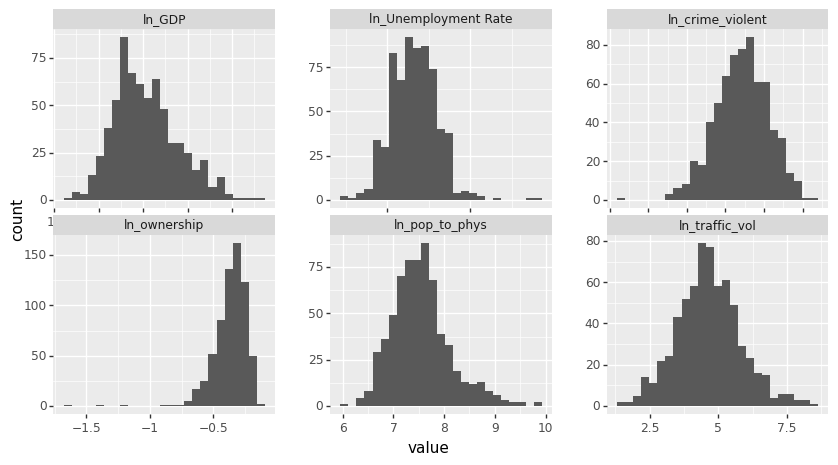

<ggplot: (8767278372265)>

In [32]:
##visualize
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25})
)

Logging seems to have normalized most of the variables, however, the variable 'ownership', which indicates the percentage of occupied households that are owned, has not benefitted from logging. Since we want to maintain as much information as possible, this variable will be left as is in its logged form for now.

Now let us look at the distribution of the only categorical variable. Based on the data source, "1 means “Yes” and indicates that at least one community water system in the county received at least one health-based violation during the specified time frame. 0 means “No” and indicates that there were no health-based drinking water violations in any community drinking water system in the county."https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-factors/physical-environment/air-water-quality/drinking-water-violations



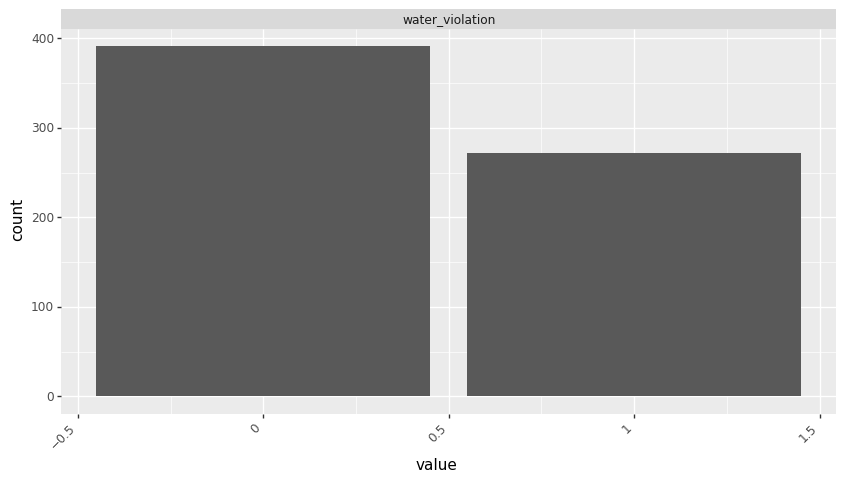

<ggplot: (8767278141666)>

In [33]:
##categorical variables
f = train_X.select_dtypes(include="category").melt()
(
    ggplot(f,aes(x="value")) +
    geom_bar() +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,5),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75},
         axis_text_x=element_text(rotation=45, hjust=1))
)

Majority of the counties in the training data set have not recieved a health-based drinking water violation in 2018. Conversely, over 200 counties have recieved a  health-based drinking water violation in 2018.

__What is the distribution of the outcome variable?__

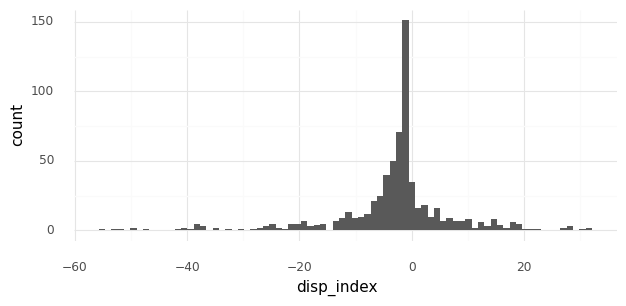

<ggplot: (8767278383583)>

In [34]:
##distribution of outcome variable
(
    ggplot(train_y,
           aes(x="disp_index")) +
    geom_histogram() +
    theme_minimal() +
    theme(figure_size = (7,3)) 
)

Similar to attempt 1, it appears that, for majority of the counties represented in the training data set, the disparity index has a value less than zero. There are fewer observations the are greater than 0 on the disparity index (i.e, where disparity is detected)

### Step 4:  High-level preprocessing

In attempt 1, I elected to only log variables. In this attempt, I will log and bin variables based on the insights from the exploration of the training data above.

#### `AA`: Asian American Population

In [35]:
df2['AA'] =  np.log(df2['AA'])

#### `BA`: Black  Population

In [36]:
df2['BA'] =  np.log(df2['BA'])

#### `IA`: Native American Population

In [37]:
df2['IA'] =  np.log(df2['IA'])

#### `HI`: Hispanic  Population

In [38]:
df2['HI'] =  np.log(df2['HI'])

#### `WH`: White Population

In [39]:
df2['WH'] =  np.log(df2['WH'])

#### `TOT_POP`: Total County Population

In [40]:
df2['TOT_POP'] =  np.log(df2['TOT_POP'])

#### `cases`: County-Level Total COVID-19 Cases

In [41]:
df2['cases'] =  np.log(df2['cases'])

#### `asian_cases`: County-Level Asian American COVID-19 Cases

In [42]:
## categorize : 0 if value is 0; 1 if less than or equal to the median; and 2 if greater than the median
median_aacases= df2.loc[df2['asian_cases'] > 0,'asian_cases'].median()
df2['asian_cases'] =np.where(df2['asian_cases']==0,0,np.where(df2['asian_cases'] <= median_aacases,1,2))

In [43]:
## check categories
df2.asian_cases.value_counts()

0    740
1     73
2     72
Name: asian_cases, dtype: int64

#### `black_cases`: County-Level Black COVID-19 Cases

In [44]:
## categorize : 0 if value is 0; 1 if less than or equal to the median; and 2 if greater than the median
median_bacases= df2.loc[df2['black_cases'] > 0,'black_cases'].median()
df2['black_cases'] =  np.where(df2['black_cases']==0,0,np.where(df2['black_cases'] <= median_bacases,1,2))

In [45]:
## check categories
df2.black_cases.value_counts()

0    436
1    227
2    222
Name: black_cases, dtype: int64

#### `native_cases`: County-Level Native American COVID-19 Cases

In [46]:
## categorize : 0 if value is 0; 1 if less than or equal to the median; and 2 if greater than the median
median_nacases= df2.loc[df2['native_cases'] > 0,'native_cases'].median()
df2['native_cases'] =  np.where(df2['native_cases']==0,0,np.where(df2['asian_cases'] <= median_nacases,1,2))

In [47]:
## check categories
df2.native_cases.value_counts()

0    848
1     37
Name: native_cases, dtype: int64

#### `hispanic_cases`: County-Level Hispanic COVID-19 Cases

In [49]:
## categorize : 0 if value is 0; 1 if less than or equal to the median; and 2 if greater than the median
median_hispcases= df2.loc[df2['hispanic_cases'] > 0,'hispanic_cases'].median()
df2['hispanic_cases'] =  np.where(df2['hispanic_cases']==0,0,np.where(df2['hispanic_cases'] <= median_hispcases,1,2))

In [50]:
## check categories
df2.hispanic_cases.value_counts()

0    542
1    172
2    171
Name: hispanic_cases, dtype: int64

#### `white_cases`: County-Level White COVID-19 Cases

In [51]:
## categorize : 0 if value is 0; 1 if less than or equal to the median; and 2 if greater than the median
median_whcases= df2.loc[df2['asian_cases'] > 0,'white_cases'].median()
df2['white_cases'] =  np.where(df2['white_cases']==0,0,np.where(df2['white_cases'] <= median_whcases,1,2))

In [53]:
## check categories
df2.white_cases.value_counts()

1    750
2     78
0     57
Name: white_cases, dtype: int64

#### `GDP`: County-Level GDP

In [54]:
df2['GDP'] =  np.log(df2['GDP'] )

#### `Unemployment Rate`: County-Level Unemployment Rate

In [55]:
df2['Unemployment Rate'] =  np.log(df2['Unemployment Rate'])

#### `ownership`: County-Level Homeownership

In [56]:
df2['ownership'] =  np.log(df2['ownership'])

#### `pop_to_phys`: County-Level Ration of Physician to Population

In [57]:
df2['pop_to_phys'] =  np.log(df2['pop_to_phys'])

#### `traffic_vol`: County-Level Traffic Volume

In [58]:
df2['traffic_vol'] =  np.log(df2['traffic_vol'])

#### `crime_violent`: County-Level Violent Crime Rate

In [59]:
df2['crime_violent'] =  np.log(df2['crime_violent'])

### Step 5: Resplit data

In [60]:
##isolate outcome and features
y = df2[['disp_index']]
## drop irrelevant columns when isolating features from outcome
X = df2.drop(columns=['disp_index','fips','state','county','cases_min_pop','min_pop' ])

In [61]:
## split in to training (75% of data) and test (25% of data); set random state to replicate same split every time
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [62]:
##check shape to confirm split
print(train_X.shape[0]/df2.shape[0])
print(test_X.shape[0]/df2.shape[0])

0.7491525423728813
0.25084745762711863


### Step 6:  Pre-Processing

Let's rescale our training data for now, but we'll put the preprocessing into a modeling pipeline later on.

In [63]:
## scale so variables are on the same scale
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [64]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,cases,white_cases,black_cases,hispanic_cases,native_cases,asian_cases,TOT_POP,WH,BA,AA,...,ownership,residential_seg,food_index,pop_to_phys,water_violation,air_pollution,Uninsured adults raw value,exercise_opp,income_ineq,crime_violent
0,0.230882,0.0,0.5,0.0,0.0,0.0,0.038272,0.105389,0.434721,0.148238,...,0.799496,0.189728,0.519481,0.704762,0.0,0.620690,0.599676,0.002838,0.278707,1.000000
1,0.334819,0.5,0.0,0.0,0.0,0.0,0.305764,0.441796,0.372548,0.365671,...,0.899218,0.286858,0.896104,0.381583,0.0,0.456897,0.342282,0.796939,0.116908,0.523915
2,0.191722,0.5,0.0,0.0,0.0,0.0,0.246709,0.393486,0.252455,0.394330,...,0.851336,0.429110,0.727273,0.365229,0.0,0.551724,0.333812,0.606069,0.172537,0.637204
3,0.321898,0.5,0.0,0.0,0.0,0.0,0.588783,0.667941,0.534367,0.699018,...,0.774085,0.240227,0.753247,0.215917,1.0,0.327586,0.151389,0.745715,0.102503,0.631934
4,0.362854,0.5,0.0,0.0,0.0,0.0,0.296184,0.438293,0.336354,0.284123,...,0.915178,0.269961,0.870130,0.494180,0.0,0.706897,0.097373,0.638658,0.111644,0.535370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0.528181,0.5,0.0,1.0,0.0,0.0,0.605341,0.693900,0.439258,0.688660,...,0.757103,0.242246,0.818182,0.159517,1.0,0.370690,0.158680,0.962148,0.326099,0.636216
659,0.160356,0.0,0.0,0.5,0.0,0.0,0.139522,0.308745,0.117849,0.188226,...,0.850759,0.362681,0.857143,0.461725,0.0,0.465517,0.179591,0.747222,0.162910,0.399849
660,0.433675,0.5,0.0,0.0,0.0,0.0,0.385587,0.513458,0.318314,0.442200,...,0.830282,0.357828,0.857143,0.286089,1.0,0.370690,0.029752,0.792356,0.223717,0.739559
661,0.280270,0.5,0.5,0.0,0.0,0.0,0.266967,0.412754,0.344523,0.209959,...,0.913823,0.475489,0.727273,0.422418,1.0,0.689655,0.168221,0.517572,0.257586,0.411973


### Step 6: Modeling

We have a continuously distributed outcome variable i.e., a regression problem.Let's test how these models perform

- Linear Regression 
- KNN
- Decision Trees
- Bagging 
- Random Forest

In [65]:
## set fold generator to split and test on same data across models
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

Let's run each model individually then compare the performance of the different models in a plot.

We'll use **mean squared error** as our performance metrics.

In [66]:
## performance metric
use_metrics = ["neg_mean_squared_error"]

#### Linear Model

In [67]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### KNN

In [68]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### Decision Tree

In [69]:
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

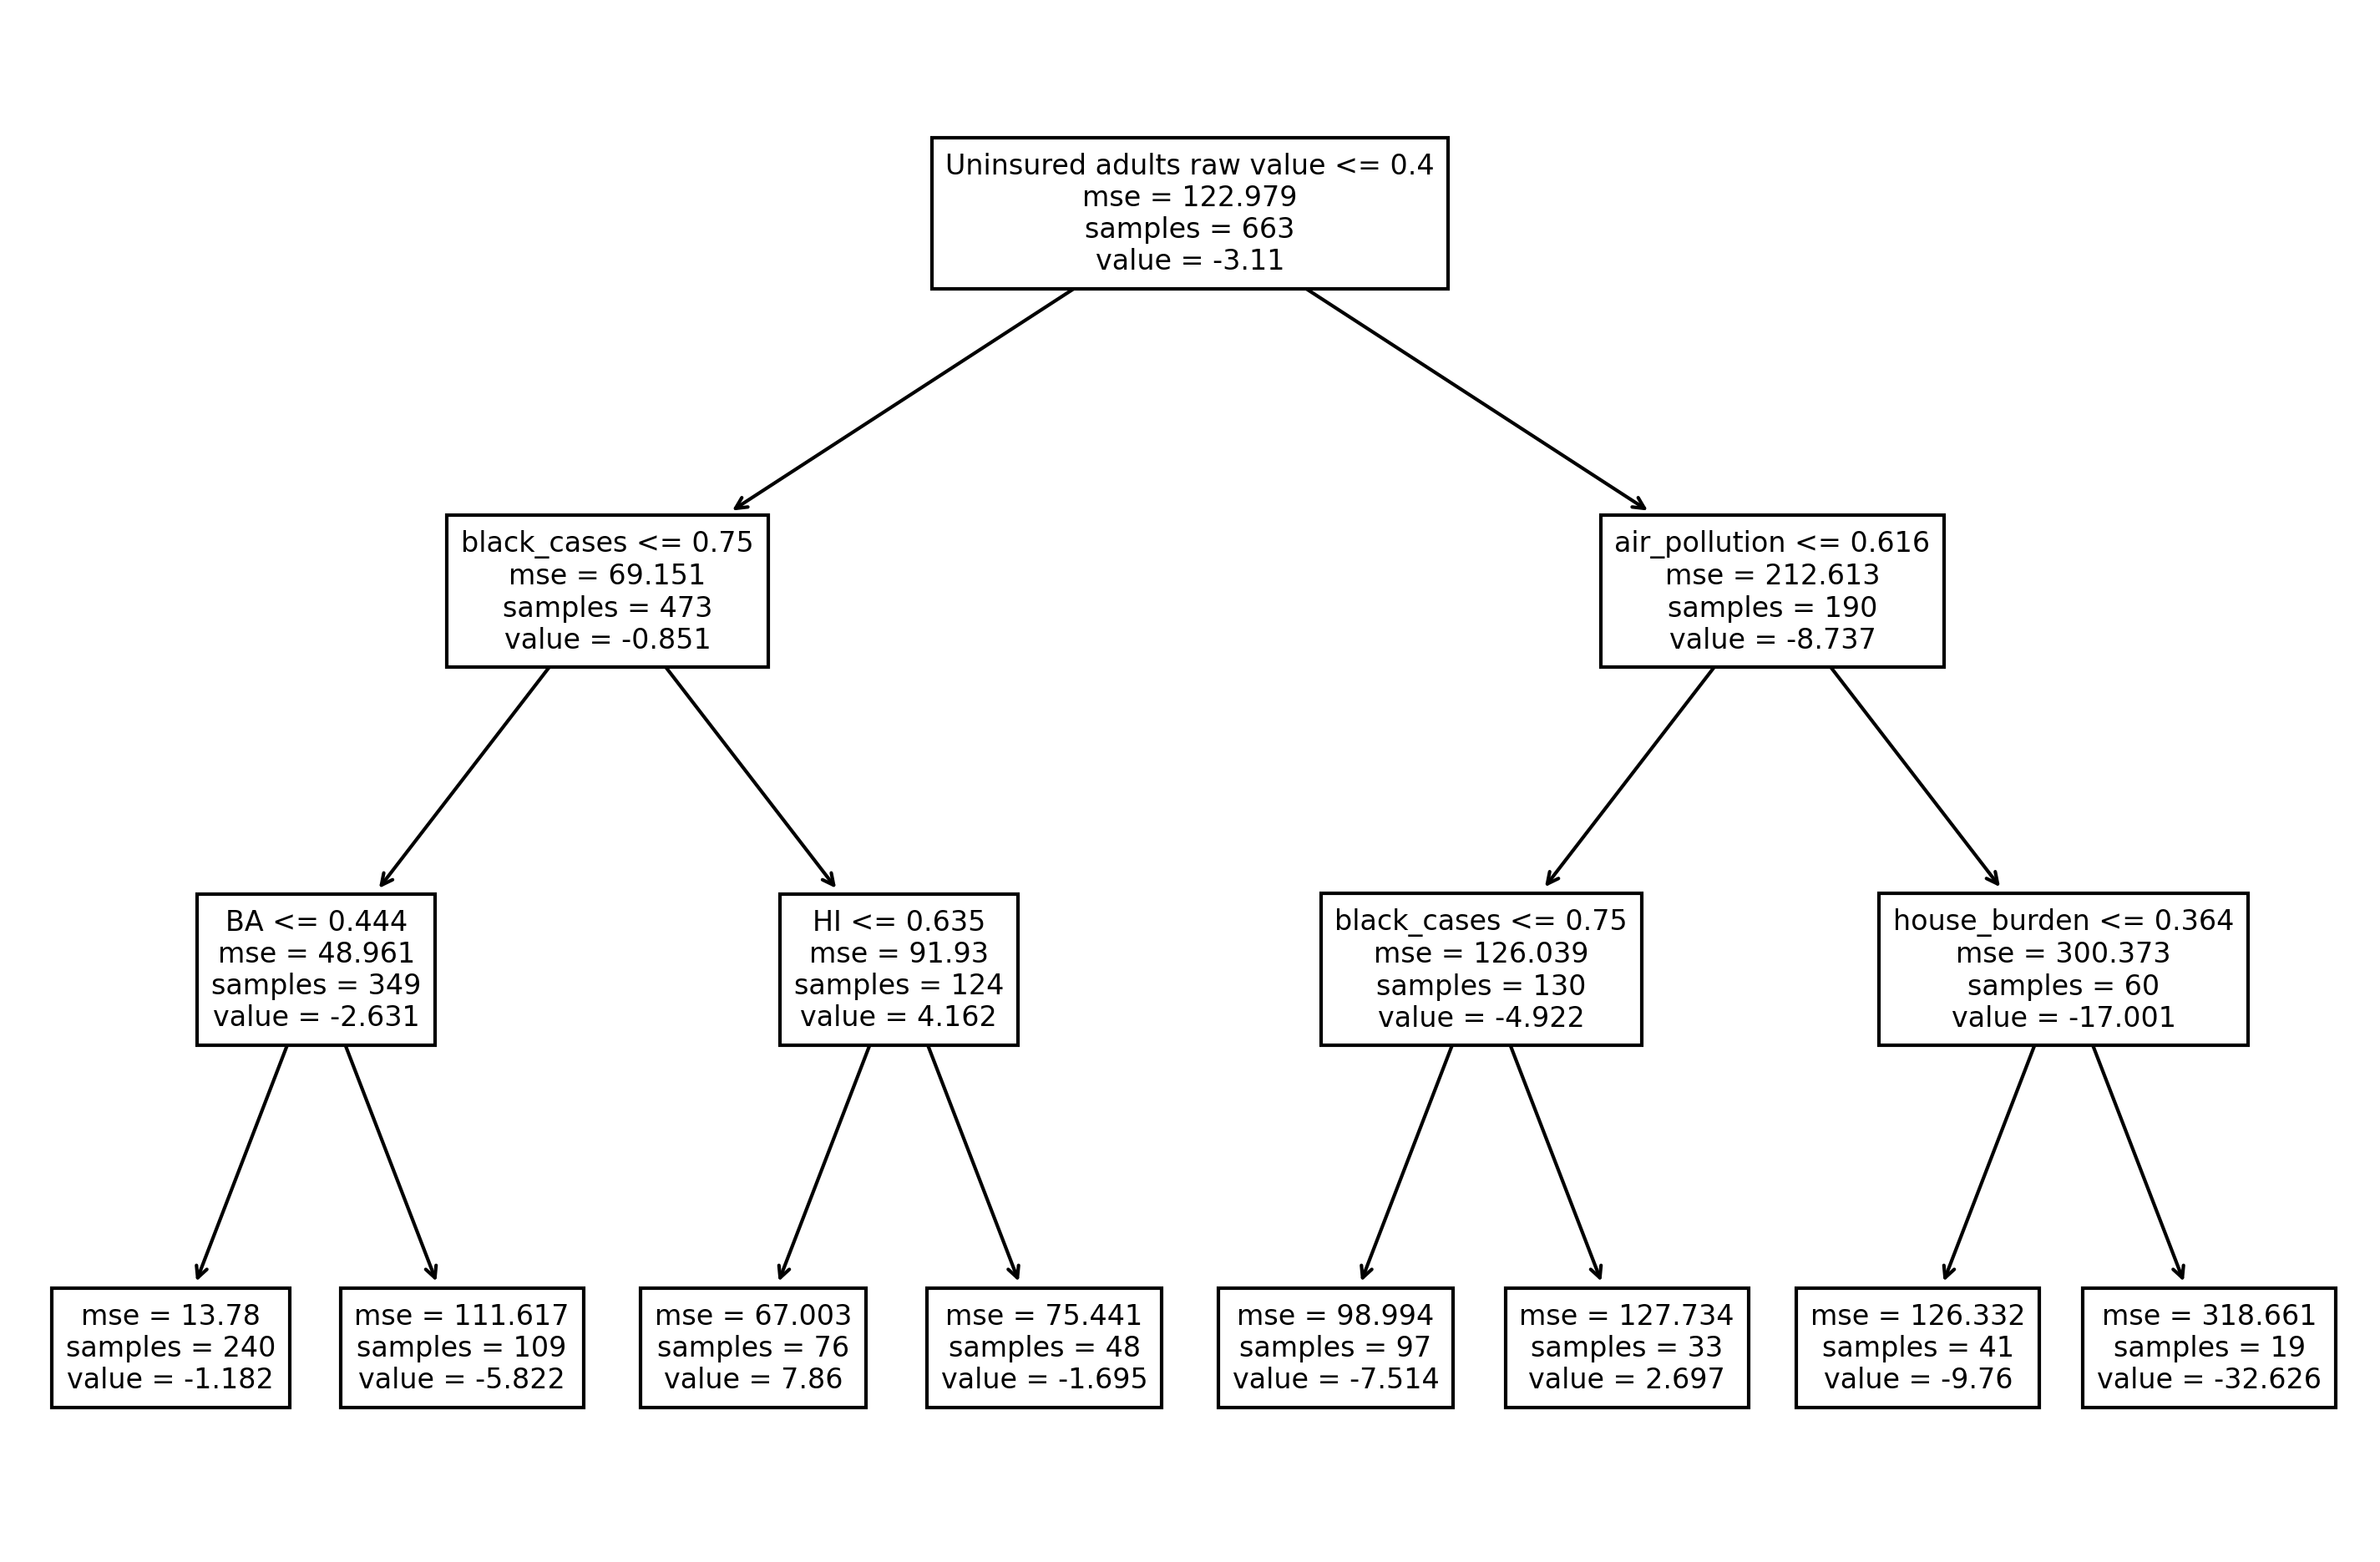

In [70]:
## let's visualize the decision tree's decisions to get some insights
mod = DTree(max_depth=3) # Initialize the modeling object 
mod.fit(train_X,train_y) # Fit the model

# Plot the tree
plt.figure(figsize=(12,8),dpi=300)
rules = tree.plot_tree(mod,feature_names = col_names,fontsize=8)

In the first attempt, the decision tree selected hispanic_cases as the first variable to begin breaking off from. Here, we see that it is using the variable for number of uninsured adults. Also, air_pollution was not part of the decision tree in the first model-- it is interesing to see it appear here. Perhaps it will be amongst the most important variable list we will generate later.

#### Bagging

In [71]:
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### Random Forest

In [72]:
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

Let's collect the scores from each model and compare their performance. 

In [73]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores)
collect_scores

,lm,knn,dt,bag,rf
0,85.841564,113.322439,165.400292,90.241990,95.110828
1,72.491627,81.896835,160.585539,58.944558,60.931248
2,47.385666,71.120386,134.949043,52.223135,48.638465
3,92.038352,99.667087,231.754144,82.835982,65.916136
4,75.473728,110.323396,126.916762,81.808264,74.258977


In [74]:
## rename columns 
collect_scores=collect_scores.rename(columns={'lm':'Linear Model', 'knn':'KNN', 'dt':'Decision Tree', 'bag':'Bagging','rf':'Random Forest'})

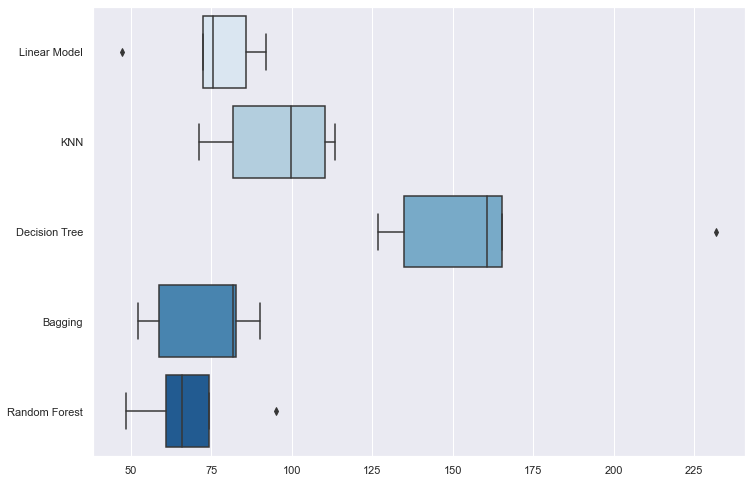

In [75]:
## let's visualize using seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=collect_scores, orient="h", palette="Blues")

Let's use ggplot for visualization, too.

In [76]:
##turn from wide to long for visualization
collect_scores=collect_scores.melt(var_name="Model",value_name="MSE")

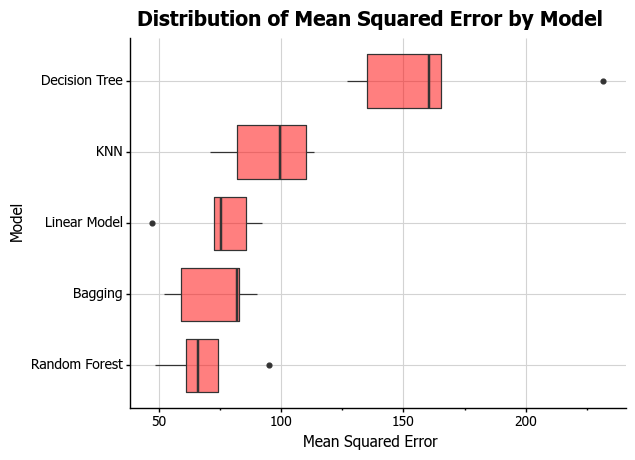

<ggplot: (8767249466375)>

In [78]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
MSE_model_2=(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot(fill="red", alpha=0.5) +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    ##scale_color_brewer(palette="Blues") +
    coord_flip() + theme_classic()+ ggtitle("Distribution of Mean Squared Error by Model")
    + theme(dpi=100,
        legend_position="bottom",
        legend_direction="horizontal",
        legend_title_align="center",
        legend_box_spacing=0.4,
        legend_key=element_blank(),
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )

)
MSE_model_2
##MSE_model_2.save("MSE_model_2.png")

The mean squared errors are still quite high but are looking better than the first attempt. Ther is also a variation in which model performed best. Random Forest performed best across both models, but Bagging, , which was in third place is now in second place, followed by Linear Model, KNN, and Decision Tree.

### Tuning: KNN, Decision Tree, and Random Forest 

#### KNN

In [79]:
## try different number of neighbours to see which does best
knn_tune_params = {'n_neighbors':[1, 10, 25, 35, 50, 75, 100, 250]}

In [80]:
## wrap tuning parameter in GridSearchCV
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [81]:
## fit model
tune_knn.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': [1, 10, 25, 35, 50, 75, 100, 250]},
             scoring='neg_mean_squared_error')

In [82]:
## see best parameter: how many neighbours?
tune_knn.best_params_

{'n_neighbors': 10}

In [83]:
## what is the best score?
tune_knn.best_score_

-90.0294469181074

#### Decision Tree 

In [84]:
## try different number for the 'max_depth' parameter
tune_dt = GridSearchCV(DTree(),{'max_depth':[i for i in range(20)]},
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [85]:
## fit model
tune_dt.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [86]:
## best parameter
tune_dt.best_params_

{'max_depth': 2}

In [87]:
## what is the best score
tune_dt.best_score_

-107.74837261946223

#### Random Forest

In [88]:
## try different number for the 'max_depth','n_estimators', and 'max_features' parameters
rf_params = {'max_depth':[5, 10, 20],
             'n_estimators':[100,500,1000],
              'max_features': [10,20,30]}  

In [89]:
## wrap parameters in GridSearchCV
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [90]:
## fit the model
tune_rf.fit(train_X,train_y) 

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 20], 'max_features': [10, 20, 30],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [91]:
## best parameters
tune_rf.best_params_

{'max_depth': 20, 'max_features': 20, 'n_estimators': 1000}

In [92]:
## best score
tune_rf.best_score_

-69.52480685520354

After trying different configurations for the parameters, the Random Forest performed the best. The insights from tuning (i.e,. how to configure parameters) will be incorporated in the modeling pipeline below.

### Modeling Pipeline

In [93]:
# (0) Split the data 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=123)

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['cases', 'white_cases', 'black_cases', 'hispanic_cases', 'native_cases',
       'asian_cases', 'TOT_POP', 'WH', 'BA', 'AA', 'IA', 'HI', 'GDP',
       'pov_perc', 'Med_inc', 'Unemployment Rate', 'traffic_vol',
       'house_burden', 'ownership', 'residential_seg', 'food_index',
       'pop_to_phys', 'water_violation', 'air_pollution',
       'Uninsured adults raw value', 'exercise_opp', 'income_ineq',
       'crime_violent'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[1, 10, 25, 35, 50, 75, 100, 250]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[i for i in range(20)]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[5, 10, 20],
     'model__n_estimators':[100,500,1000],
     'model__max_features': [10,20,30]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['cases',
                                                                          'white_cases',
                                                                          'black_cases',
                                                                          'hispanic_cases',
                                                                          'native_cases',
                                                                          'asian_cases',
                                                                          'TOT_POP',
                                                                          'WH',
            

In [94]:
## what is the best score
search.best_score_

-69.59491656813778

In [95]:
## best parameter configuratioon
search.best_params_

{'model': RandomForestRegressor(max_depth=20, max_features=20, n_estimators=500),
 'model__max_depth': 20,
 'model__max_features': 20,
 'model__n_estimators': 500}

In [96]:
## which model performed best
search.best_estimator_

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['cases', 'white_cases',
                                                   'black_cases',
                                                   'hispanic_cases',
                                                   'native_cases',
                                                   'asian_cases', 'TOT_POP',
                                                   'WH', 'BA', 'AA', 'IA', 'HI',
                                                   'GDP', 'pov_perc', 'Med_inc',
                                                   'Unemployment Rate',
                                                   'traffic_vol',
                                                   'house_burden', 'ownership',
                                                   'residential_seg',
                                                   'food_index', 'pop_to_phys',
           

In [98]:
## save model and parameter configurations into an object for further exploration below
rf_mod = search.best_estimator_

Eventhough our best model is performing poorly, let us explore how it used the variables it was fed. This can inform pre-processing and modeling steps used in future attempts.

In [99]:
from sklearn.inspection import permutation_importance

In [100]:
## let's shuffle the variables 50 times and see which variables the model relied on and which ones it relied the least on
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=50)

In [101]:
## organize shuffle results as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

In [102]:
## generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

In [103]:
# arrange dataframe in order from most to least important variables 
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)
vi_dat

,variable,vi,std,low,high
0,black_cases,0.846874,0.045195,0.756483,0.937264
1,BA,0.395332,0.020547,0.354239,0.436426
2,Uninsured adults raw value,0.241523,0.018556,0.204411,0.278635
3,house_burden,0.123266,0.010309,0.102649,0.143883
4,air_pollution,0.101021,0.014421,0.072179,0.129864
5,food_index,0.059386,0.003725,0.051936,0.066837
6,HI,0.054191,0.005228,0.043734,0.064647
7,WH,0.050049,0.003095,0.043860,0.056238
8,Med_inc,0.028988,0.001452,0.026085,0.031892
9,crime_violent,0.028370,0.001766,0.024838,0.031903


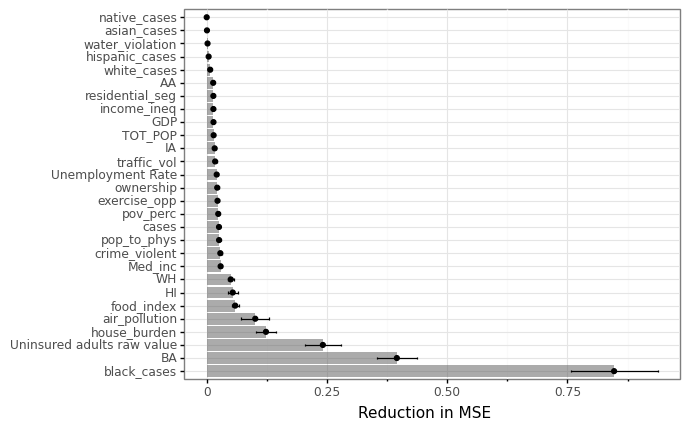

<ggplot: (8767249496369)>

In [104]:
## visualize the dataframe above using ggplot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in MSE",x="")
)

The top five variables the model relied on most are: the number of black cases in a county; black population in a county; number of uninsured adults in a county; housing burden in a county; and measure of air pollution in a county. Similar to attempt 1, this model also relied on the very variables that were used to create the outcome variable. However, we are also able to see a new varaibles (that are not related to population or number of cases) appear on this list--air pollution. Housing burden and uninsured were also present in attempt 1, but here we see that uninsured adults is more important to the model than housing burden. Note that the reverse was true in the first attempt. 

Let's create partial dependency plots to explore these variables.

In [106]:
## import requred packages
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance
from pdpbox import pdp

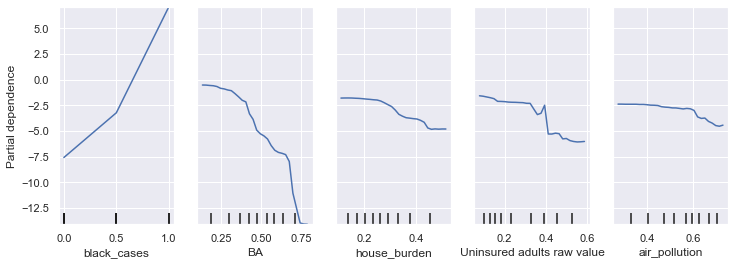

In [107]:
# Target specific features
features = ['black_cases','BA','house_burden','Uninsured adults raw value','air_pollution']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

Similar to attempt 1, there are some counter intuitive results. Keeping in mind that our model is not predicitive and that these results are not meaningful, we still see that an increase in the black population in a county; housing burden in a county; the number of uninsured adults in a county; and measure of air pollution in a county is associated with a decrease in disparity. 

In the next attempt, I will use a modified csv with additional variables from the County Health Rankings and Roadmaps dataset. 